In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [2]:
test_data = pd.read_csv('final.csv')
test_data.head()
print(len(test_data))

833


In [4]:
train_data = pd.read_csv('V1.4_Training.csv')
train_data.head()

In [5]:
def create_bin_dict(train_dict, train_df):
    for str_len in train_df:
        if str_len < 50:
            train_dict[50] += 1
        elif str_len <=100:
            train_dict[100] += 1
        elif str_len <=150:
            train_dict[150] += 1
        elif str_len <=200:
            train_dict[200] += 1
        elif str_len <=250:
            train_dict[250] += 1
        else:
            train_dict[300] += 1
    return train_dict

## Train Data Analysis

{50: 1411, 100: 3338, 150: 2130, 200: 900, 250: 353, 300: 368}


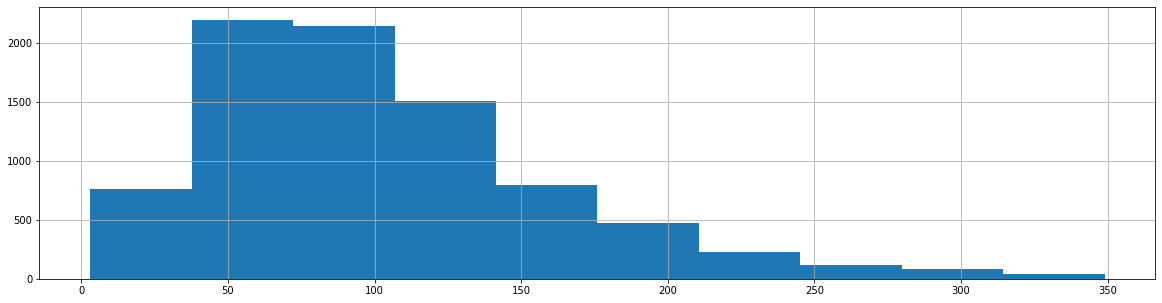

In [6]:
len_df = train_data['sentence'].apply(lambda x: len(x))
train_dict = {50:0, 100:0, 150:0, 200:0, 250:0, 300:0 }
train_dict = create_bin_dict(train_dict, len_df)
print(train_dict)

len_df = len_df[len_df<350]
plt.figure(figsize=(20,5))
len_df.hist(bins=10)

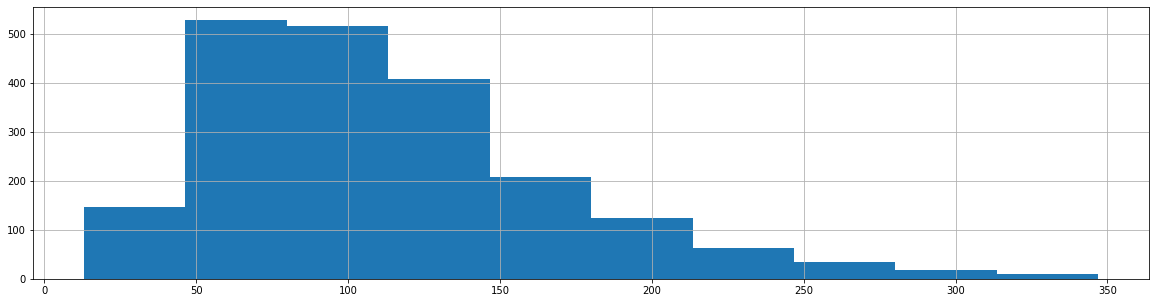

In [9]:
train_p = train_data[train_data['label'] == 1]
len_p_df = train_p['sentence'].apply(lambda x: len(x))
len_p_df = len_p_df[len_p_df<350]
plt.figure(figsize=(20,5))
len_p_df.hist(bins=10)

## Test Set Analysis

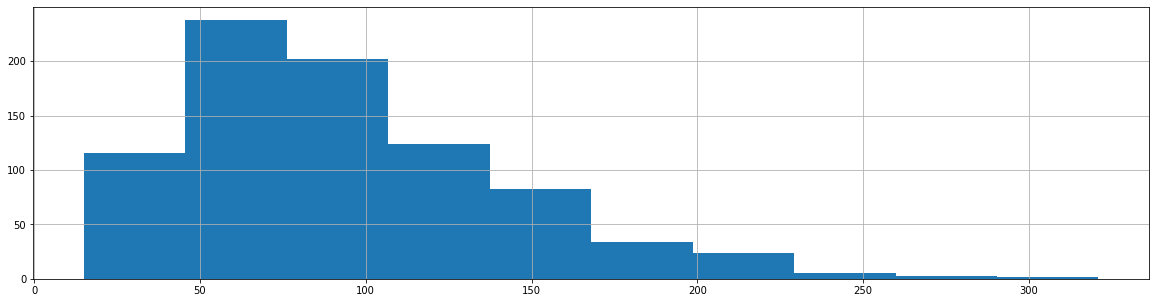

In [8]:
len_df = test_data['Sentence'].apply(lambda x: len(x))
len_df = len_df[len_df<350]
plt.figure(figsize=(20,5))
len_df.hist(bins=10)

In [3]:
incorrect = test_data[test_data['label'] != test_data['prediction']]
fps = test_data[(test_data['label'] == 0) & (test_data['prediction'] == 1)] # false neagitves
fns = test_data[(test_data['label'] == 1) & (test_data['prediction'] == 0)] # false positives

{50: 6, 100: 20, 150: 18, 200: 7, 250: 3, 300: 1}


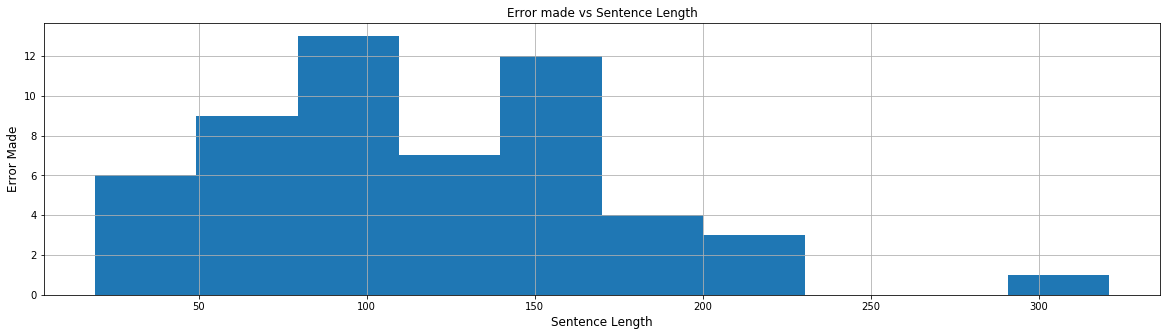

In [14]:
len_df = incorrect['Sentence'].apply(lambda x: len(x))
incorrect_dict = {50:0, 100:0, 150:0, 200:0, 250:0, 300:0 }
incorrect_dict = create_bin_dict(incorrect_dict, len_df)
print(incorrect_dict)
plt.figure(figsize=(20,5))
plt.xlabel('Sentence Length', fontsize = 12)
plt.ylabel('Error Made', fontsize = 12)
plt.title("Error made vs Sentence Length", fontsize = 12)
len_df.hist(bins=10)

{50: 5, 100: 11, 150: 6, 200: 2, 250: 1, 300: 0}
50 0.3543586109142452
100 0.329538645895746
150 0.28169014084507044
200 0.2222222222222222
250 0.28328611898017
300 0.0


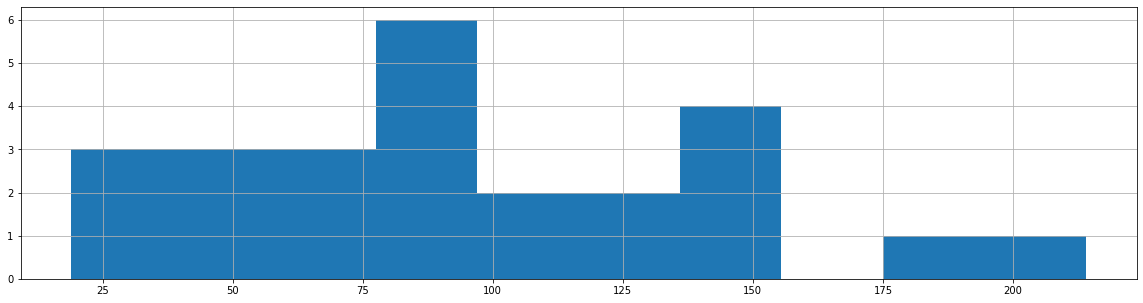

In [11]:
# len_df = fps['Sentence'].apply(lambda x: len(x))
# incorrect_dict = {50:0, 100:0, 150:0, 200:0, 250:0, 300:0 }
# incorrect_dict = create_bin_dict(incorrect_dict, len_df)
# print(incorrect_dict)
# #len_df = len_df[len_df<500]
# plt.figure(figsize=(20,5))
# len_df.hist(bins=10)

# keys = [50,100,150,200,250,300]
# for key in keys:
#     print(key, incorrect_dict[key]/train_dict[key]*100)

{50: 1, 100: 9, 150: 12, 200: 5, 250: 2, 300: 1}
50 0.07087172218284904
100 0.2696225284601558
150 0.5633802816901409
200 0.5555555555555556
250 0.56657223796034
300 0.2717391304347826


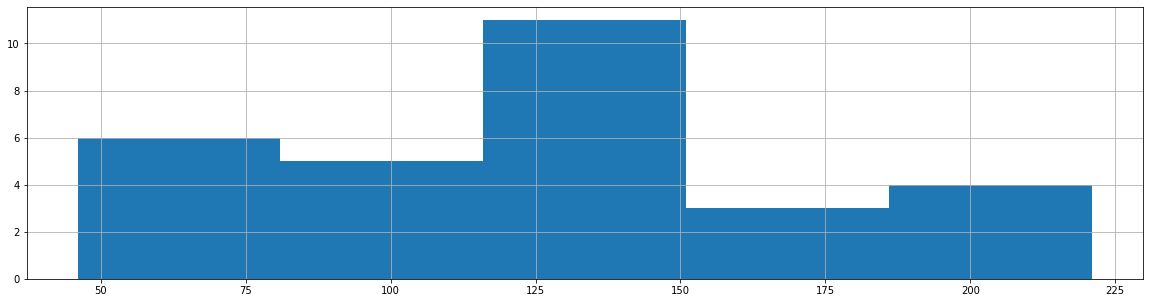

In [12]:
# len_df = fns['Sentence'].apply(lambda x: len(x))
# incorrect_dict = {50:0, 100:0, 150:0, 200:0, 250:0, 300:0 }
# incorrect_dict = create_bin_dict(incorrect_dict, len_df)
# print(incorrect_dict)
# len_df = len_df[len_df<300]
# plt.figure(figsize=(20,5))
# len_df.hist(bins=5)

# keys = [50,100,150,200,250,300]
# for key in keys:
#     print(key, incorrect_dict[key]/train_dict[key]*100)